#### Comparison of average estimated score about good and bad combinations

In [1]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('C:/github/LiverDeconv')
import liver_deconv as ld
from _utils import processing as pc
from _utils import plot4deconv

***
##### 1. Optimized vs Non-optimized

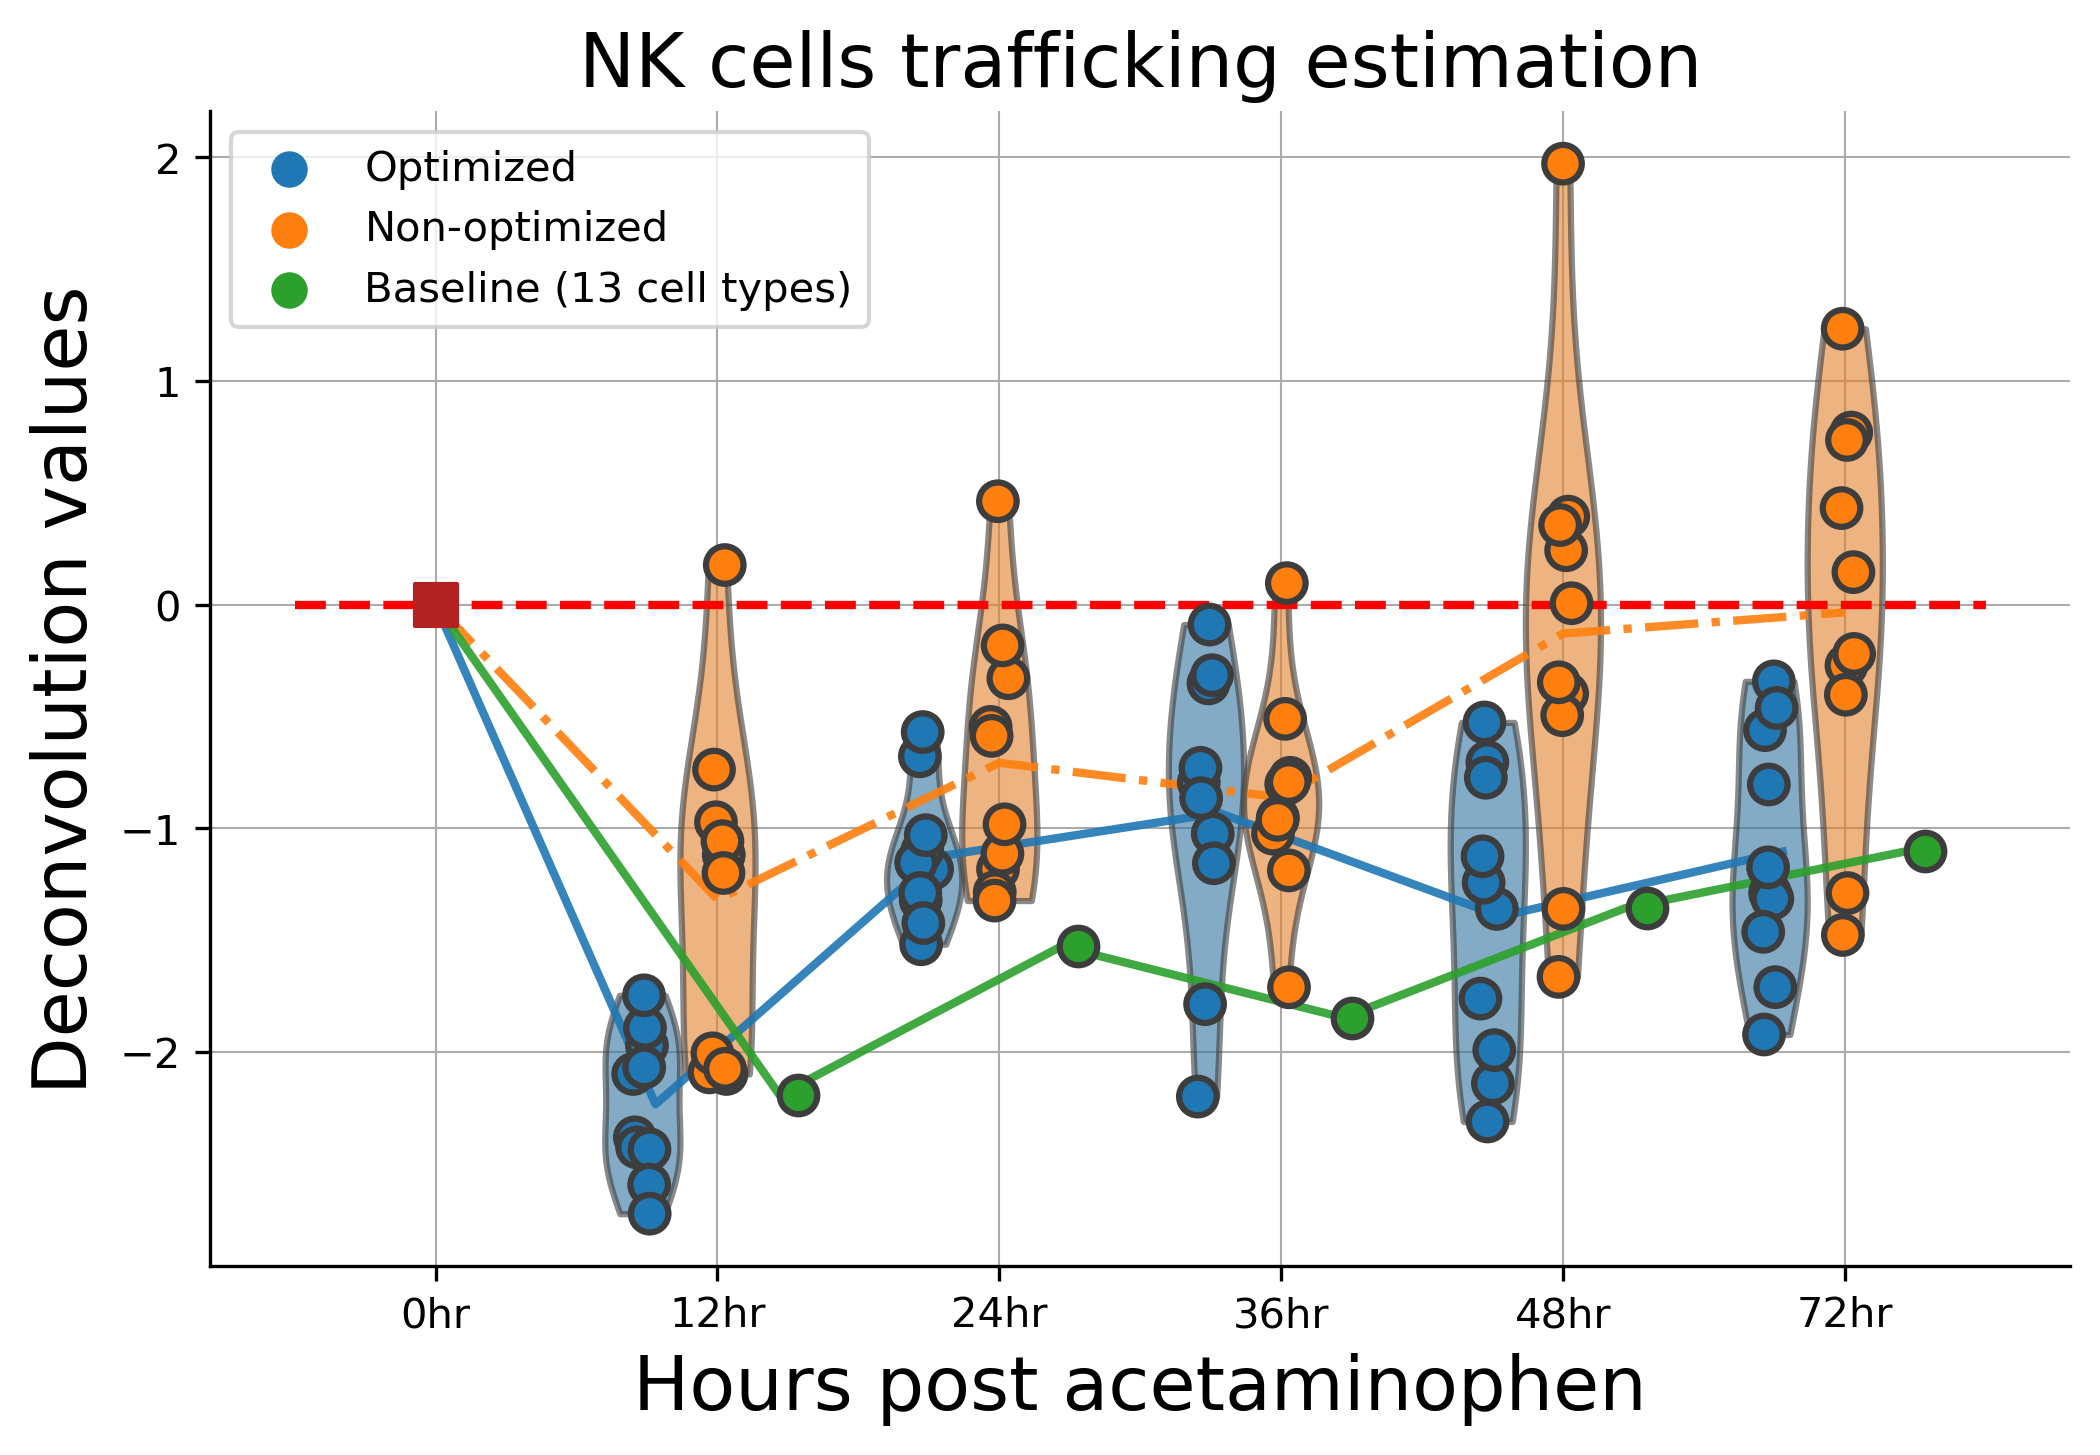

In [2]:
#%% plot module dev (good vs bad vs baseline)
good_melt = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/results/nk_good_melt.csv',index_col=0)
bad_melt = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/results/nk_bad_melt.csv',index_col=0)
total_melt = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/results/nk_baseline_melt.csv',index_col=0)
n = 10

merge_melt = pd.concat([good_melt,bad_melt,total_melt])
sort_index = ['12hr','24hr','36hr','48hr','72hr']
merge_melt = merge_melt[merge_melt['variable'].isin(sort_index)]
fig = plt.figure(figsize=(8,5),dpi=300)
ax = fig.add_subplot(1,1,1) # identify the plotting 
# violin
sns.violinplot(x='variable', y='value', data=merge_melt, hue="status", inner=None, cut=0, scale="count",linewidth=1.5)
plt.setp(ax.collections, alpha=.6)
# strip
sns.stripplot(x='variable', y='value', data=merge_melt, hue="status", jitter=True, linewidth=1.5, size=9, dodge=True)
handles = ax.legend_.legendHandles
plt.legend(handles[3:6],["Optimized","Non-optimized","Baseline (13 cell types)"])
# ctrl base line
plt.scatter(x=[-1],y=[0],marker="s",color='firebrick',s=100,zorder=3)
plt.hlines(y=0,xmin=-1.5,xmax=5-0.5,color="red",ls="dashed",linewidth=2,zorder=2)
# mean value plotting
good_means = good_melt.groupby('variable').mean()['value'].tolist()
bad_means = bad_melt.groupby('variable').mean()['value'].tolist()
base = total_melt.groupby('variable').mean()['value'].tolist()
plt.plot([-1]+[i-0.22 for i in range(5)],good_means,linewidth=2,alpha=0.9,zorder=1)
plt.plot([i-1 for i in range(6)],bad_means,ls='-.',linewidth=2,alpha=0.9,zorder=1)
plt.plot([-1]+[i+0.22 for i in range(5)],base,linewidth=2,alpha=0.9,zorder=1)

plt.xticks([i-1 for i in range(6)],['0hr','12hr','24hr','36hr','48hr','72hr'])
ax.set_axisbelow(True)
ax.grid(color="#ababab",linewidth=0.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.title("NK cells trafficking estimation",fontsize=18)
plt.xlabel("Hours post acetaminophen",fontsize=18)
plt.ylabel("Deconvolution values",fontsize=18)
plt.show()

***
##### 2. Validation with true value

standardz population control


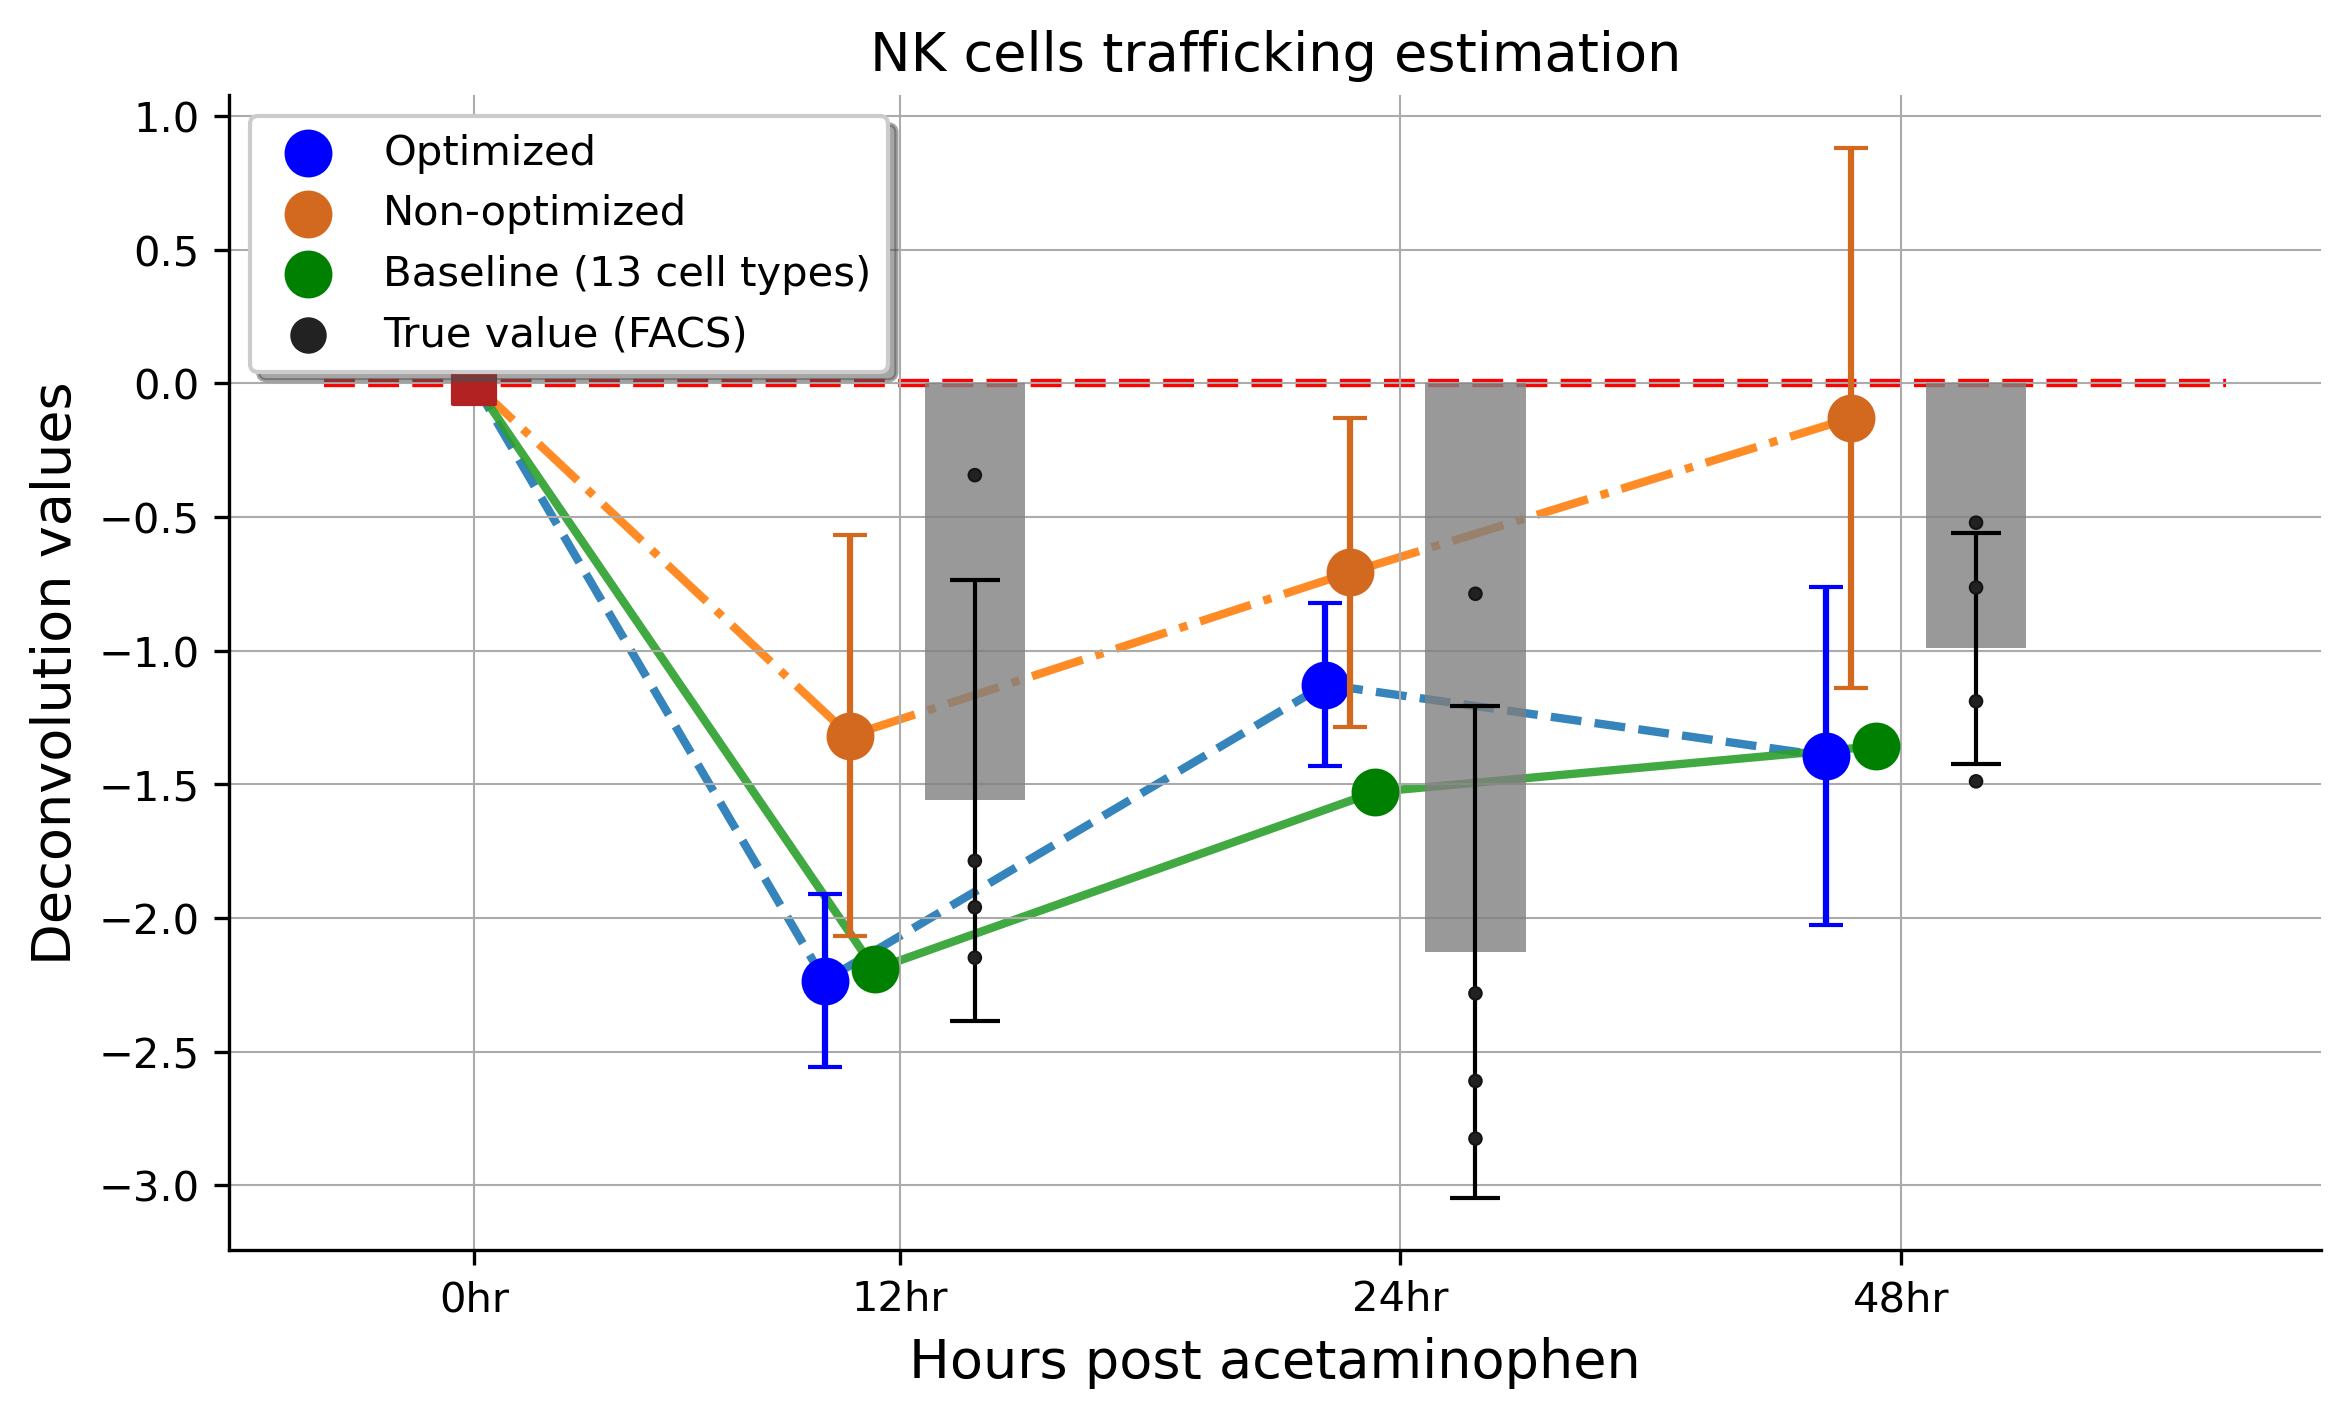

In [4]:
#%% validation with FACS (scatter + error bar)
good_melt = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/results/nk_good_melt.csv',index_col=0)
bad_melt = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/results/nk_bad_melt.csv',index_col=0)
total_melt = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/results/nk_baseline_melt.csv',index_col=0)

# 1st
# add ctrl information
facs = pd.read_csv('C:/github/LiverDeconv/_Figures_new/Figure_5/data/FACS_1st.csv',index_col=0)

cell = 'NK'
df = facs[[cell]].T
for i in range(4):
    df['APAP#0hr_'+str(i)] = [1]
df = df.T
df.index = [t.split('_')[0] for t in df.index]

z_df = pc.standardz_sample(df)
ctrl_mean = z_df.loc["APAP#0hr"][cell].mean()
fxn = lambda x : x-ctrl_mean
z_df[cell] = z_df[cell].apply(fxn)

z_df['variable'] = [t.split("#")[1] for t in z_df.index.tolist()]
z_df.columns = ['value','variable']
z_df['status'] = ['facs']*len(z_df)

# merge and plot
sort_index = ['12hr','24hr','48hr']
good_target = good_melt[good_melt['variable'].isin(sort_index)]
bad_target = bad_melt[bad_melt['variable'].isin(sort_index)]
base_target = total_melt[total_melt['variable'].isin(sort_index)]
facs_target = z_df[z_df['variable'].isin(sort_index)]

# mean values
good_means = good_target.groupby('variable').mean()['value'].tolist()
bad_means = bad_target.groupby('variable').mean()['value'].tolist()
facs_means = facs_target.groupby('variable').mean()['value'].tolist()
base_means = base_target.groupby('variable').mean()['value'].tolist()

# std values
good_std = good_target.groupby('variable').std()['value'].tolist()
bad_std = bad_target.groupby('variable').std()['value'].tolist()
facs_std = facs_target.groupby('variable').std()['value'].tolist()

fig = plt.figure(figsize=(9,5),dpi=300)
ax = fig.add_subplot(1,1,1) # identify the plotting 

# scatter & errorbar
plt.errorbar([i-1.3 for i in range(1,4)],good_means,yerr=good_std,fmt="o",color='blue',ms=0,capsize=4,ecolor="blue",label='Optimized') # optimized
plt.scatter([i-1.3 for i in range(1,4)],good_means,s=110,color='blue',label='Optimized')
plt.errorbar([i-1.25 for i in range(1,4)],bad_means,yerr=bad_std,fmt="o",color='chocolate',ms=0,capsize=4,ecolor="chocolate",label='Non-optimized') # non-optimized
plt.scatter([i-1.25 for i in range(1,4)],bad_means,s=110,color='chocolate',label='Non-optimized')
plt.scatter([i-1.2 for i in range(1,4)],base_means,s=110,color='green',label='Baseline (13 cell types)')

# strip
sns.stripplot(x='variable', y='value', data=facs_target, hue="status", jitter=False, linewidth=0.5, size=3, dodge=True, color='black') # FACS
error_bar_set = dict(lw=1.0,capthick=1.0,capsize=6)
ax.bar([i-1 for i in range(1,4)],facs_means,yerr=facs_std,tick_label=facs_target.columns,width=0.2,alpha=0.8,color='grey',zorder=1,error_kw=error_bar_set)
handles = ax.legend_.legendHandles
plt.legend(handles[0:4],["Optimized","Non-optimized","Baseline (13 cell types)","True value (FACS)"],fontsize=10,shadow=True)

# ctrl base line
plt.scatter(x=[-1],y=[0],marker="s",color='firebrick',s=100)
plt.hlines(y=0,xmin=-1.3,xmax=3-0.5,color="red",ls="dashed",linewidth=2,zorder=-2)

# plot
plt.plot([-1]+[i-1.3 for i in range(1,4)],[0]+good_means,ls='--',linewidth=2,alpha=0.9,zorder=-3,color='tab:blue') # optimized
plt.plot([-1]+[i-1.25 for i in range(1,4)],[0]+bad_means,ls='-.',linewidth=2,alpha=0.9,zorder=-3,color='tab:orange') # non-optimized
plt.plot([-1]+[i-1.2 for i in range(1,4)],[0]+base_means,ls='-',linewidth=2,alpha=0.9,zorder=-3,color='tab:green') # baseline

plt.xticks([-1]+[i-1.15 for i in range(1,4)],['0hr','12hr','24hr','48hr'])
ax.grid(color="#ababab",linewidth=0.5)
ax.set_axisbelow(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.title("NK cells trafficking estimation",fontsize=13)
plt.xlabel("Hours post acetaminophen",fontsize=13)
plt.ylabel("Deconvolution values",fontsize=13)
plt.show()
